In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

import pickle

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
#from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import wilcoxon

In [2]:
feature_set = pd.read_pickle("./feature_set.pkl")
turnOverRate = pd.read_pickle("./turnOverRate.pkl")
LocationCodeComprehensive = pd.read_pickle("./LocationCodeComprehensive.pkl")
location_pay = pd.read_pickle("./location_pay.pkl")
location_sd = pd.read_pickle("./location_sdS_df.pkl")

In [3]:
LocationCodeComprehensive.rename(columns = {'Unnamed: 2':'location code'}, inplace = True) 


0      5015
1      5020
2      5021
3      5022
4      5023
       ... 
252    5946
253    5947
254    5948
255    5906
256    5907
Length: 257, dtype: int64

In [4]:
all_features = pd.concat([feature_set,location_pay,location_sd], axis = 1)


poly = pp.PolynomialFeatures(interaction_only=True,include_bias = False)
all_features_interaction=poly.fit_transform(all_features)
all_features_interaction=pd.DataFrame(data=all_features_interaction)
all_features_interaction.head()

,0,1,2,3,4,5,6,7,8,9,...,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277
0,1.496637,0.084248,0.138599,0.220066,1.221343,1.139475,1.125294,0.994916,0.274221,1.229335,...,-1.244796,1.076369,-0.684921,0.604777,-0.961780,0.612005,-0.540393,-0.529198,0.467275,-0.297339
1,-0.549661,-0.119342,-1.306784,-0.972549,-1.140865,-1.123760,-1.501034,-1.556083,-0.941953,-0.617944,...,1.569697,0.607361,0.814480,-0.905170,0.872752,1.170375,-1.300692,0.452851,-0.503275,-0.674900
2,0.577287,-0.276289,-0.402631,0.241940,-0.454408,-0.379317,-0.944135,-0.203789,-0.442965,-0.625386,...,0.405405,-0.525482,0.104186,-0.585362,-0.354012,0.070189,-0.394353,-0.090979,0.511157,-0.101346
3,-0.482090,-0.893064,0.082008,0.163632,1.103529,0.281656,0.264472,0.419771,0.451285,-0.343488,...,-0.106702,-0.063108,-0.064710,-0.209771,0.571254,0.585751,1.898836,0.346439,1.123058,1.151557
4,-0.994165,-1.591461,-0.656436,0.042593,-0.060927,-0.986578,-1.008201,-0.564969,-0.913683,-0.538270,...,-0.069755,0.002773,-0.052163,0.002675,-0.003844,0.072313,-0.003708,-0.002874,0.000147,-0.002773


In [8]:

XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

reg = LassoCV(cv=5, max_iter = 5000).fit(XCV_train, YCV_train)

YpredLassoCV2 = reg.predict(XCV_test)
test_r_squared2 = r2_score(YCV_test, YpredLassoCV2)

In [9]:
test_r_squared2

-0.005576188808204874

In [10]:
# Try running the cross validation Lasso for different train test split and get the
#mean r-squared, alpha, and weights.


xCV = all_features_interaction
yCV = turnOverRate #Turn over

train_number = 200
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
test_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number,all_features_interaction.shape[1]))

for trialNo in range(train_number):
    
    #split 80-20
    XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

    reg = LassoCV(cv=5, max_iter = 5000).fit(XCV_train, YCV_train)

    YpredLassoCV = reg.predict(XCV_test)
    test_r_squared[trialNo] = r2_score(YCV_test, YpredLassoCV)
    lasso_alpha[trialNo] = reg.alpha_
    lasso_coef[trialNo,:] = reg.coef_ 
    #print("r^2 on test data : %f" % r2ScoreLassoCV)

    #ActualPredictionCV = pd.DataFrame({'Actual': YCV_test, 'Predicted': YpredLassoCV})

    #sb.lmplot(x='Predicted', y='Actual', data=ActualPredictionCV)
with open('lasso_interaction_output.pickle', 'wb') as f:
    pickle.dump([test_r_squared, lasso_alpha, lasso_coef], f)

/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01589966003058707, tolerance: 0.015503297942400502
  positive)
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021924468450186363, tolerance: 0.017902453002246285
  positive)
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019854360871348842, tolerance: 0.016469981678627375
  positive)
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/li

/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021628999973794555, tolerance: 0.01568154768714451
  positive)
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015997286267929733, tolerance: 0.014174070621682194
  positive)
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01910190600897199, tolerance: 0.017036830847278014
  positive)
/home/akira/anaconda3/envs/unsupervisedLearning/lib/python3.6/site-packages/sklearn/lin

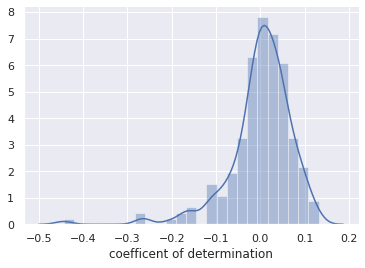

In [11]:
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

sb.distplot(test_r_squared_df,axlabel='coefficent of determination')
sb.despine()

In [9]:

#with open('lasso_output.pickle', 'wb') as f:
#    pickle.dump([test_r_squared, lasso_alpha, lasso_coef], f)

In [4]:
# Getting back the objects:
with open('lasso_output.pickle', 'rb') as f:  
    test_r_squared, lasso_alpha, lasso_coef = pickle.load(f)

with open('original_values.pickle', 'rb') as f:  
    TurnOver2, dataX2 = pickle.load(f)


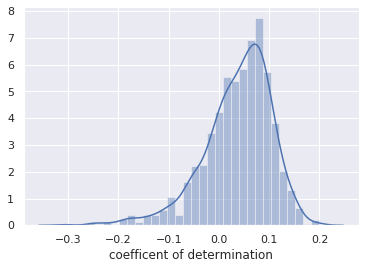

In [47]:

test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

sb.distplot(test_r_squared_df,axlabel='coefficent of determination')
sb.despine()

In [6]:
#One sample t-test to show the significance.
from scipy.stats import ttest_1samp

tset, pval = ttest_1samp(test_r_squared, 0)
print(pval)


[1.52570745e-57]


In [7]:
sum_ranks, pval_w = wilcoxon(test_r_squared[:,0])
print(pval_w)

3.51059490731279e-61


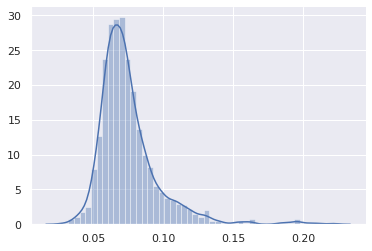

In [8]:
lasso_alpha_df = pd.DataFrame(data=lasso_alpha)
lasso_coef_df = pd.DataFrame(data=lasso_coef)

sb.distplot(lasso_alpha_df)
sb.despine()

In [9]:
mean_coef=lasso_coef_df.mean()


Text(0.5, 1.0, 'average weight for each feature')

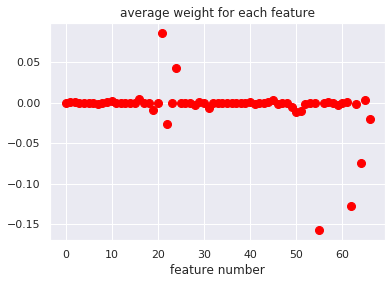

In [54]:

plt.plot(mean_coef,linestyle='none',marker='o',markersize=8,color='red') 
plt.xlabel('feature number')
#plt.ylabel('average weight for each feature')
plt.title('average weight for each feature')

In [17]:
feature_set.to_pickle("./feature_set.pkl")

lasso_r_squared_1000 = pd.DataFrame(data=test_r_squared)
lasso_alpha_1000 = pd.DataFrame(data=lasso_alpha)
lasso_coef_1000 = pd.DataFrame(data=lasso_coef)

lasso_r_squared_1000.to_pickle("./lasso_r_squared_1000.pkl")
lasso_alpha_1000.to_pickle("./lasso_alpha_1000.pkl")
lasso_coef_1000.to_pickle("./lasso_coef_1000.pkl")



In [11]:
feature_set = pd.read_pickle("./feature_set.pkl")

lasso_r_squared_df = pd.read_pickle("./lasso_r_squared_1000.pkl")
lasso_alpha_df = pd.read_pickle("./lasso_alpha_1000.pkl")
lasso_coef_df = pd.read_pickle("./lasso_coef_1000.pkl")



In [12]:
abs_mean_coef=abs(mean_coef)

In [13]:
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef.head(10)

55    0.157820
62    0.127956
21    0.086186
64    0.075024
24    0.042282
22    0.027030
66    0.020481
50    0.011860
51    0.010044
19    0.008916
dtype: float64

In [14]:
all_features = pd.concat([feature_set,location_pay,location_sd], axis = 1)


In [15]:
#Choose the features with top n coefficients 

features_number = 3
#get the top n features and construct a new feature.
top_coef=abs_mean_coef.sort_values(ascending=False)

selected_features = all_features.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    selected_features = pd.concat([selected_features, all_features.iloc[:,top_coef.index[features+1]]], axis = 1)



In [16]:
selected_features.head()

,55,1,21
0,0.467229,-1.180298,1.103600
1,-1.504403,-1.045167,-0.092121
2,0.888779,0.775737,-0.562840
3,-0.026882,-0.108571,-0.092121
4,0.679443,-0.224316,-1.280074


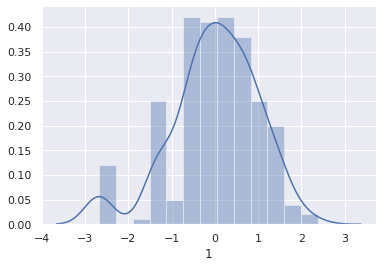

In [16]:
#Look at the distribution of the turnover rate (in the normalized space)
#And see if there are natural boundaries for the classes.
sb.distplot(turnOverRate)
sb.despine()

In [19]:
turn_over_label

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],

In [17]:
#looks like we can split between -2 and -1, but this is very unbalanced classes
#Make labels as 0, 1, and 2.
turn_over_label=np.zeros((turnOverRate.shape[0],1))
turn_over_label[turnOverRate<-2] = 2
idx = (turnOverRate>=-2)&(turnOverRate<=-1)
turn_over_label[idx] = 1



In [20]:
turnOverRate.shape[0]

257

In [36]:
#Try once and see how it looks.
X_train, X_test, y_train, y_test = train_test_split(selected_features, turn_over_label, test_size = 0.2,stratify=turn_over_label)

#resample because groups 1 and 2 are much smaller than 0. Especially 2 is smaller
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

clf = LogisticRegressionCV(cv=5).fit(X_train_res, y_train_res)

In [37]:
y_prob = clf.predict_proba(X_test)

In [42]:
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="macro")

IndexError: too many indices for array

In [45]:
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
macro_roc_auc_ovr

0.45410518225735624

In [22]:
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE

train_number = 1000
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
logit_r_squared = np.zeros((train_number,1))
logit_coef = np.zeros((3,7,train_number))

for trialNo in range(train_number):
    

    X_train, X_test, y_train, y_test = train_test_sstratify=y,plit(selected_features, turn_over_label, test_size = 0.2,stratify=turn_over_label)

    #resample because groups 1 and 2 are much smaller than 0. Especially 2 is smaller
    sm = SMOTE()
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

    clf = LogisticRegressionCV(cv=5).fit(X_train_res, y_train_res)
    predicted_label = clf.predict(X_test)
    
    logit_r_squared[trialNo] = clf.score(X_test, y_test)
    logit_coef[:,:,trialNo] = clf.coef_ 
    

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [21]:
clf.coef_.shape[1]

7

In [17]:
poly = pp.PolynomialFeatures(interaction_only=True,include_bias = False)
selected_features_interaction=poly.fit_transform(selected_features)
selected_features_interaction=pd.DataFrame(data=selected_features_interaction)
selected_features_interaction.head()

,0,1,2,3,4,5
0,0.467229,-1.180298,1.103600,-0.551469,0.515634,-1.302577
1,-1.504403,-1.045167,-0.092121,1.572352,0.138588,0.096282
2,0.888779,0.775737,-0.562840,0.689458,-0.500240,-0.436616
3,-0.026882,-0.108571,-0.092121,0.002919,0.002476,0.010002
4,0.679443,-0.224316,-1.280074,-0.152410,-0.869737,0.287141


In [18]:
poly.get_feature_names()



['x0', 'x1', 'x2', 'x0 x1', 'x0 x2', 'x1 x2']

In [19]:
#make a model with interactions.
#Run N times and take the average.
#Try to use the shuffle split function => later
x_linear = selected_features_interaction
y_linear = turnOverRate #Turn over

train_number = 450
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split 80-20
    Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(x_linear, y_linear, test_size=0.2)
    

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(Xl_train,Yl_train)
    
    
    Ypredl = linear_reg.predict(Xl_test)
    
    linear_r_squared[trialNo] = r2_score(Yl_test, Ypredl)
    linear_coef[trialNo,:] = linear_reg.coef_

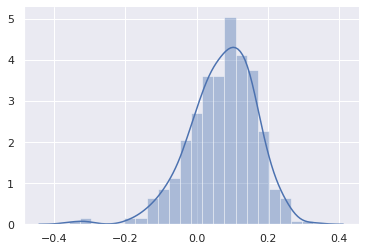

In [20]:
linear_r_squared_df=pd.DataFrame(data=linear_r_squared)
#linear_r_squared_df.hist()
sb.distplot(linear_r_squared_df)
sb.despine()

In [21]:
sum_ranks, pval_w = wilcoxon(linear_r_squared[:,0])
print(pval_w)

1.72314810927932e-42


In [38]:
mean_linear_coef[5]

NameError: name 'mean_linear_coef' is not defined

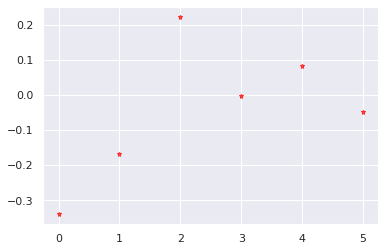

In [22]:
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 


In [24]:
index = LocationCodeComprehensive==5015

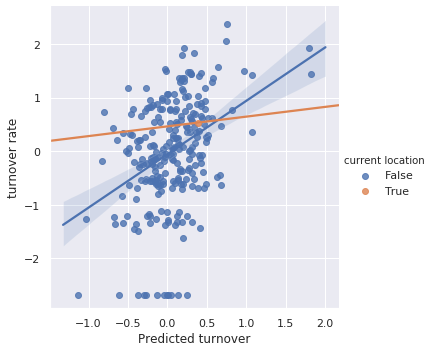

In [25]:
PredictionMatrix=x_linear.multiply(mean_linear_coef)
PredictionValue=PredictionMatrix.sum(axis=1)

#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': turnOverRate, 'Predicted turnover': PredictionValue, 'current location': index} 
dataForPlotMVP = pd.DataFrame(frameMVP)
sb.lmplot(x='Predicted turnover', y='turnover rate', data=dataForPlotMVP, hue = 'current location')



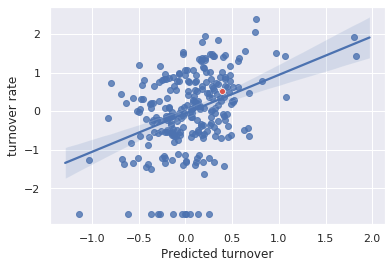

In [26]:
fig, ax = plt.subplots()

sb.regplot(x='Predicted turnover', y='turnover rate', data=dataForPlotMVP, ax = ax)

frameMVP2 = { 'turnover rate': turnOverRate[index], 'Predicted turnover': PredictionValue[index]} 
dataForPlotMVP2 = pd.DataFrame(frameMVP2)
sb.scatterplot(x='Predicted turnover', y='turnover rate', data=dataForPlotMVP2, color=sb.xkcd_rgb["pale red"], ax = ax)


In [31]:
# Getting back the objects:
with open('scaler.pickle', 'rb') as f:  
    scalerEmployeeResponse, scalerOccupancyTurnover = pickle.load(f)

In [29]:
location = 5015

In [45]:
TurnOver2=TurnOver2.reset_index(drop=True)
dataX2=dataX2.reset_index(drop=True)
base_turnover=TurnOver2[index]
percent_turnover = 25
new_turnover = base_turnover*(1-(50/100))
log_new_turnover = np.log(new_turnover+0.1)
scaled_turnover = (log_new_turnover-scalerOccupancyTurnover.mean_[1])/scalerOccupancyTurnover.scale_[1]
current_turnover = turnOverRate[index]
turnover_change = scaled_turnover-current_turnover
#currently assumes we use the top component.
#Use the dataframe selected_features_interaction because it's column is reset.
feature_change = turnover_change/(mean_linear_coef[0]+mean_linear_coef[3]*selected_features_interaction.loc[LocationCodeComprehensive==location,1]+mean_linear_coef[4]*selected_features_interaction.loc[LocationCodeComprehensive==location,2])
#bring it back to what it means in the raw data scale.
new_feature = selected_features_interaction.loc[LocationCodeComprehensive==location,0]+feature_change
new_feature_before_scale = (new_feature*scalerEmployeeResponse.scale_[55])+scalerEmployeeResponse.mean_[55]
new_feature_before_transform = 1.1-np.exp(0.1-new_feature_before_scale)

current_feature = dataX2.loc[LocationCodeComprehensive==location,55]
feature_change = new_feature_before_transform - current_feature
print(new_feature_before_transform[0])
print(current_feature)

1.0492875665990797
0    0.965517
Name: 55, dtype: float64


In [28]:
selected_features_interaction.head()

,0,1,2,3,4,5
0,0.467229,-1.180298,1.103600,-0.551469,0.515634,-1.302577
1,-1.504403,-1.045167,-0.092121,1.572352,0.138588,0.096282
2,0.888779,0.775737,-0.562840,0.689458,-0.500240,-0.436616
3,-0.026882,-0.108571,-0.092121,0.002919,0.002476,0.010002
4,0.679443,-0.224316,-1.280074,-0.152410,-0.869737,0.287141


In [46]:
pearsonr(PredictionValue, turnOverRate)

(0.38014280864088534, 2.9262203153695e-10)

In [27]:
#From Fabian Pedregosa-Izquierdo, f@bianp.net
import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

turnOver_features = pd.concat([turnOverRate, selected_features], axis = 1)
partial_corr_array = turnOver_features.to_numpy()

# Calculate the partial correlation coefficients
partial_corr_results = partial_corr(partial_corr_array)

In [27]:
partial_corr_results_df = pd.DataFrame(data=partial_corr_results)
partial_corr_results_df.head()

,0,1,2,3
0,1.000000,-0.285774,-0.180665,0.209384
1,-0.285774,1.000000,0.116342,0.644236
2,-0.180665,0.116342,1.000000,-0.175639
3,0.209384,0.644236,-0.175639,1.000000


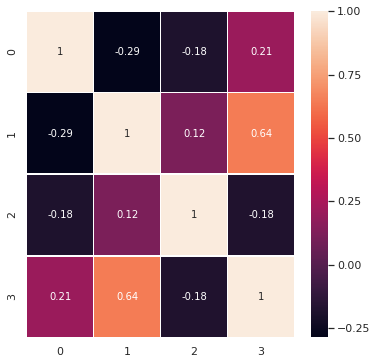

In [28]:
f, ax = plt.subplots(figsize=(6, 6))
sb.heatmap(partial_corr_results, annot=True, linewidths=.5, ax=ax)

In [25]:
questionare=all_features.iloc[:,0:60]
questionare.shape

(257, 60)

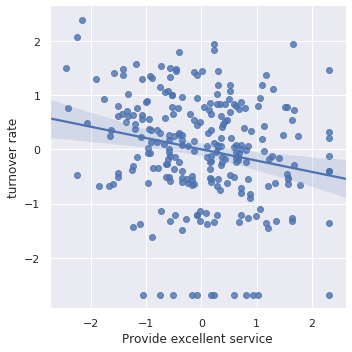

In [29]:

#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': turnOverRate, 'Provide excellent service': all_features.iloc[:,55]} 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='Provide excellent service', y='turnover rate', data=dataForPlotMVP)




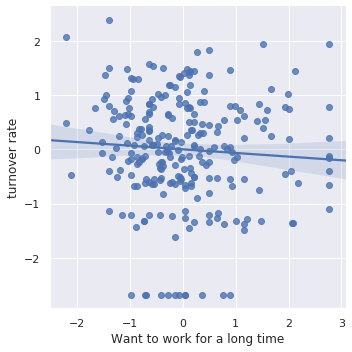

In [23]:
#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': turnOverRate, 'Want to work for a long time': all_features.iloc[:,47]} 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='Want to work for a long time', y='turnover rate', data=dataForPlotMVP)



In [28]:
#Now calulate for all the features in the questionare. 

turnOver_questionare = pd.concat([turnOverRate, questionare], axis = 1)
partial_corr_array2 = turnOver_questionare.to_numpy()

# Calculate the partial correlation coefficients
partial_corr_results2 = partial_corr(partial_corr_array2)

In [31]:
partial_corr_results2[0,48]

0.06233445098667855

In [32]:
pearsonr(all_features.iloc[:,47], turnOverRate)

(-0.067132823872621, 0.28363705247997695)